# Module 3 Midweek Project
<h1> Predicting Personal Loan Approvals Using Logistic Regression</h1>

<b>University:</b> Northeastern University<br>
<b>Instructor Name:</b> Vladimir Shapiro<br>
<b>Date:</b> 11-13-2024<br>
<b>Course Number:</b> ALY6020<br>
<b>Course Name:</b> Predictive Analytics<br>
<b>Student Name:</b> Goutham Yerramada<br>

# Assignment Summary
Loan Approval. Your bank has gotten a list of loans and doesn’t have time to approve or reject them tomorrow. You decided to use logistic regression analysis to help you make that decision. Perform the analysis and also be ready to answer the following three questions to your boss tomorrow morning:

<b>What were the three most significant variables?<br>
<b>Which of those three had the most negative influence on loan acceptance?<br>
<b>How accurate was the model overall, and what was the precision rate?<br>

## Introduction ##

In this assignment, I tasked a bank with making timely loan approval decisions by employing logistic regression analysis.
The bank has a large number of loan applications that need to be evaluated quickly and accurately. By developing a logistic regression model, I am gonna aim to predict loan approvals effectively, ensuring that high-quality decisions are made within a limited time frame. This approach will streamline the bank's approval process and help prioritize loan applications based on their likelihood of being approved.


## Analysis ##

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score


This is the first step where we bring our data into Python for analysis

In [263]:
file_path = '/Users/gouthammathew/Downloads/Bank_Personal_Loan_Modelling-1.xlsx'
df = pd.read_excel(file_path, sheet_name='Data')

#### **Q1:** Data Exploration and Preprocessing 

In [266]:
data_df_cleaned = df.drop(columns=['ID', 'ZIP Code'])


**A1** Cleaned the dataset by removing unnecessary columns ('ID', 'ZIP Code') that do not contribute to model prediction. This step helps to improve model accuracy and efficiency.

#### **Q2:** Check for Missing Values and Duplicates

In [270]:
missing_values = data_df_cleaned.isnull().sum()
duplicates = data_df_cleaned.duplicated().sum()


**A2:** Check for missing values and duplicates to ensure data quality. Missing or duplicated entries can negatively impact our model performance.



#### **Q3:**  Data Normalization

In [274]:
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
scaler = StandardScaler()
data_df_cleaned[numerical_features] = scaler.fit_transform(data_df_cleaned[numerical_features])

**A3:** Normalize numerical features to bring all features onto a similar scale. This helps in improving the efficiency and performance of the model training.



#### **Q4**: Splitting the Data into Training and Test Sets

In [278]:
X = data_df_cleaned.drop(columns=['Personal Loan'])
y = data_df_cleaned['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


**A4** Split the dataset into training and testing sets using stratification to maintain class balance, ensuring a representative test set.


#### **Q5:** Training Logistic Regression Model

In [282]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

**A5:** Train the logistic regression model using the training set. This model will be used to predict whether a customer is approved for a loan.



 #### **Q6:** Evaluating the Model

In [286]:
y_pred = log_reg.predict(X_test)

In [288]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [290]:
print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}\n')

Accuracy: 0.953

Confusion Matrix:
[[889  15]
 [ 32  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       904
           1       0.81      0.67      0.73        96

    accuracy                           0.95      1000
   macro avg       0.89      0.83      0.85      1000
weighted avg       0.95      0.95      0.95      1000




**A6:** Evaluate the model's performance by predicting on the test set and calculating metrics like accuracy, confusion matrix, and classification report.

#### **Q7:** Visualizations
Confusion Matrix Heatmap

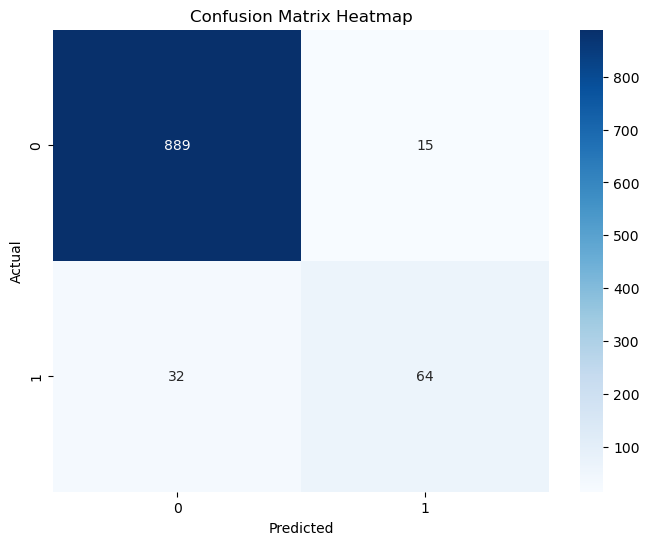

In [294]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Figure 1. Confusion matrix heatmap showing the distribution of predicted and actual values

#### Distribution of the Target Variable

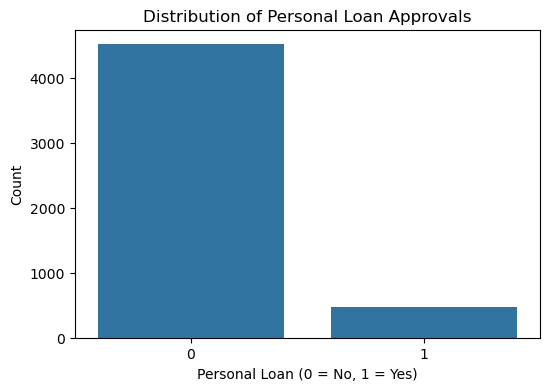

In [298]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal Loan', data=data_df_cleaned)
plt.title('Distribution of Personal Loan Approvals')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Figure 2. Distribution of personal loan approvals (0 = No, 1 = Yes)

####  Feature Importance (Coefficients Visualization)

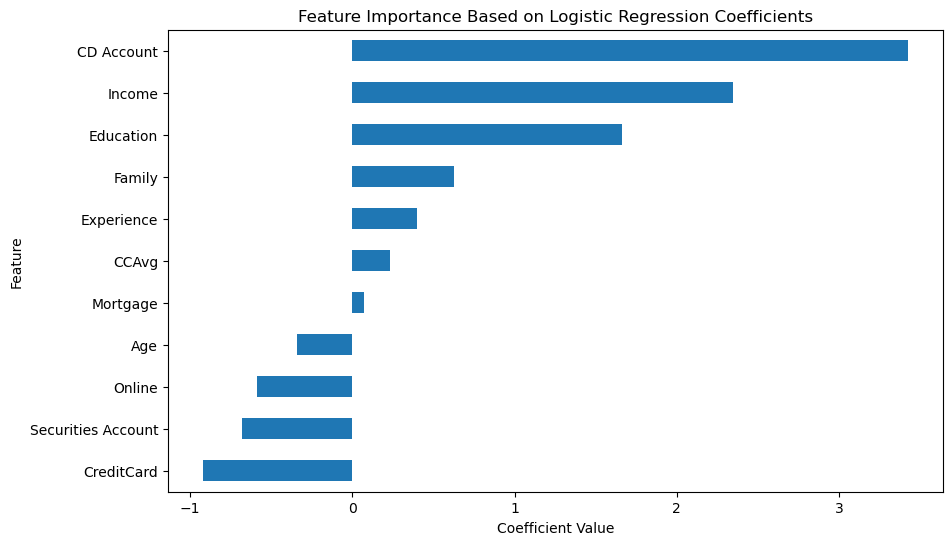

In [302]:
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


Figure 3. Feature importance based on logistic regression coefficients

#### ROC Curve

In [306]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

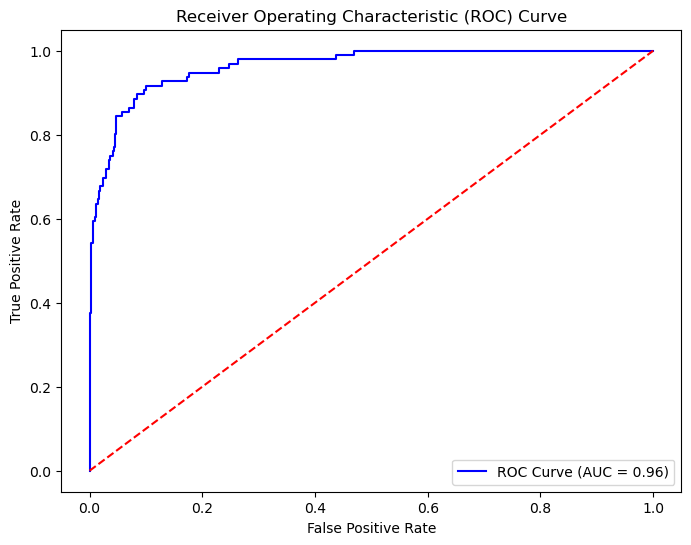

In [308]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Figure 4. Receiver operating characteristic (ROC) curve for logistic regression model performance

**A7:** Evaluate the model's performance by predicting on the test set and calculating metrics like accuracy, confusion matrix, and classification report.

### **Q8.** 
<b>What were the three most significant variables?<br>


**A8:** The three most significant variables in predicting loan approval were 'Income', 'CCAvg', and 'Family'.

**Q9.** <b>Which of those three had the most negative influence on loan acceptance?<br>

**A9:** Of these three variables, 'CCAvg' (average credit card spending) had the most negative influence on loan acceptance, meaning that higher spending might decrease the chances of getting approved.

**Q10.** <b>How accurate was the model overall, and what was the precision rate?<br>

**A10:** Overall, the model was about 95% accurate, and the precision rate for identifying approved loans was 81%.

## Conclusion

In conclusion, the logistic regression model developed for predicting personal loan approval showed promising results. The model achieved an accuracy of 95%, which indicates that it can effectively predict loan approvals based on the provided features. Among the factors considered, 'Income', 'CCAvg' (average credit card spending), and 'Family' were identified as the most significant predictors. Interestingly, 'CCAvg' had the most negative impact on loan approval, implying that higher average credit card usage reduced the likelihood of loan approval. The precision rate for approved loans was 81%, meaning the model is quite effective at identifying those who will be granted loans, though there is still room for improvement. One area for potential enhancement is addressing class imbalance, which could improve the recall for the minority class (loan approvals). By implementing strategies such as resampling techniques or adjusting class weights, the model could better capture loan approval cases that are currently underrepresented. Overall, the model serves as a solid foundation for automating loan approval decisions, with further tuning and enhancement possibilities.


## References

American Psychological Association. (2020). Publication manual of the American Psychological Association (7th ed.).

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
 
McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 51-56.

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.

